<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Regressao_linear/blob/main/desafio4_regressaoMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Análise Descritiva

In [ ]:
# Carregar os dados do arquivo CSV
data = pd.read_csv('/content/drive/MyDrive/MKT.csv')
data.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Descrição estatística dos dados
data_description = data.describe()
data_description.head()


,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


# Análise Exploratória

In [ ]:
# Matriz de correlação
correlacao_matriz = data.corr()
correlacao_matriz.head()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


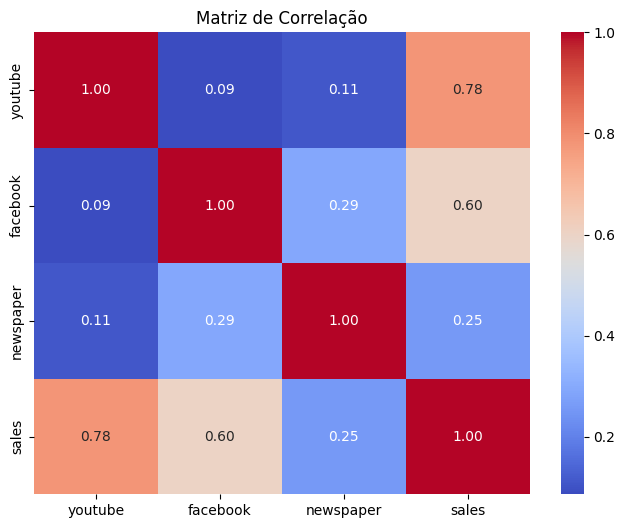

In [ ]:
# Grafico da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Modelagem

In [ ]:
# Separar as variáveis para treino e teste
X = data[['youtube', 'facebook', 'newspaper']]
y = data['sales']

In [ ]:
# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculando predição

In [ ]:
# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prever as vendas no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = r2_score(y_test, y_pred)

In [ ]:
# Coeficientes do modelo
Coeficientes = pd.DataFrame(model.coef_, X.columns, columns=['Coeficientes'])

print("Erro Quadrático Médio (MSE):", mse)
print("Coeficiente de Determinação (R²):", rmse)
print("Coeficientes do Modelo:\n", Coeficientes)

Erro Quadrático Médio (MSE): 5.576790234026713
Coeficiente de Determinação (R²): 0.872863085701216
Coeficientes do Modelo:
            Coeficientes
youtube        0.044186
facebook       0.194482
newspaper     -0.000049
